# Análisis y caracterización de sistemas LTI mediante la transformada Z

## Propiedades de los sistemas LTI

Aplicando la propiedad de convolución, en un sistema LTI discreto podemos escribir:

\begin{equation}
 y[n] = x[n] * h[n] \Rightarrow Y(z) = X(z) \cdot H(z),
\end{equation}

donde $H(z)$ es la transformada Z de la respuesta al impulso, conocida como la **función de transferencia del sistema**. Esta función proporciona mucha información acerca del sistema LTI, incluyendo el estudio directo de la causalidad y estabilidad del sistema.

### Causalidad

Recordamos que, respecto a la causalidad, definimos tres situaciones posibles para un sistema: causal, anticausal y no causal.

- Un sistema es **causal** si $h[n] = 0, n<0$. Esto implica que la respuesta al impulso es una secuencia derecha cuya transformada Z converge hacia el exterior de un círculo. Por lo tanto, un **sistema es causal** si la ROC de $H(z)$ es de la forma $|z|>a$ **y no hay polos en $\infty$**. Ilustramos esta situación con el ejemplo 1 utilizado para analizar la convergencia de la transformada Z $\left(x[n] = a^{n}u[n] \rightarrow X(z) = \frac{1}{1-\frac{a}{z}} = \frac{1}{1-az^{-1}}\right)$, asumiendo $a$ como valor real positivo:

<img src ="figures/T7/example1_zero_pole.png" width = "400">

- Un sistema es **anticausal** si $h[n] = 0, n\geq0$. Esto implica que la respuesta al impulso es una secuencia izquierda cuya transformada Z converge hacia el interior de un círculo. Por lo tanto, un **sistema es anticausal** si la ROC de $H(z)$ es de la forma $|z|<a$ **y tiene un cero en el origen**. Ilustramos esta situación con el ejemplo 2 utilizado para analizar la convergencia de la transformada Z $\left(x[n] = -a^{n}u[-n-1] \rightarrow X(z) = \frac{1}{1-az^{-1}}\right)$, asumiendo $a$ como valor real positivo:

<img src ="figures/T7/example2_zero_pole.png" width = "400">

- Un sistema es **no causal en cualquier otro caso**. Se incluyen tanto el caso definido para los sistemas causales pero con polo en $\infty$, como el de los sistemas anticausales sin cero en el origen.

### Estabilidad

Recordamos que un sistema LTI discreto es estable si:

\begin{equation}
 \sum_{n=-\infty}^{\infty} |h[n]| < \infty.
\end{equation}

Si se cumple esta condición, existe la transformada de Fourier de $h[n]$, es decir, $H(\Omega)$. Ya vimos al estudiar la convergencia de la transformada Z que la transformada de Fourier converge (sin deltas) si la circunferencia unidad se encuentra dentro de la ROC. 

Por lo tanto, un sistema es **estable si la ROC de la función de transferencia contiene la circunferencia unidad ($|z|=1$)**.

A continuación, se ilustran algunos ejemplos:

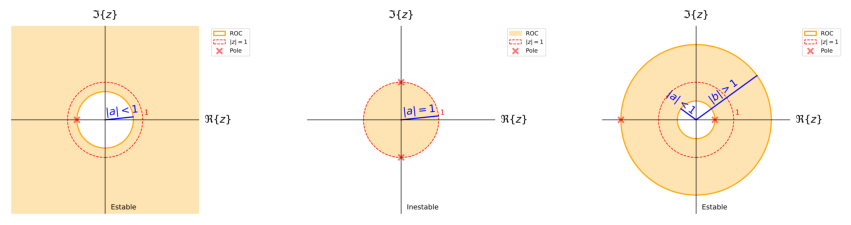

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# read images
img_1 = mpimg.imread('figures/T7/stable_causal.png')
img_2 = mpimg.imread('figures/T7/nonstable_anticausal.png')
img_3 = mpimg.imread('figures/T7/stable_ring.png')

# create subplot axis
fig, axs = plt.subplots(1,3,figsize=(15,11))

# plot the images
axs[0].imshow(img_1)
axs[1].imshow(img_2)
axs[2].imshow(img_3)

# turn off the axis
axs[0].axis('off')
_ = axs[1].axis('off')
_ = axs[2].axis('off')

### Invertibilidad

Dos sistemas LTI discretos son invertibles entre sí, si para sus respuestas al impulso se cumple (aplicando la propiedad de convolución):

\begin{equation}
 h[n] * h_i[n] = \delta[n] \Rightarrow H(z) \cdot H_i(z) = 1 \rightarrow H_i(z) = \frac{1}{H(z)},
\end{equation}

siendo $H(z)$ la función de transferencia de un sistema LTI, y $H_i(z)$ la función de transferencia de su correspondiente sistema inverso.

**Los polos y ceros de $H(z)$ pasan a ser ceros y polos, respectivamente, de $H_i(z)$**.

Un sistema LTI puede tener varios sistemas inversos (o ninguno) con distintas propiedades de causalidad y estabilidad de acuerdo con su ROC. Ilustramos este hecho con un ejemplo:

**Ejemplo**: $h[n] = \delta[n] + a\delta[n-1], |a| < 1.$

\begin{equation}
 H(z) = 1 + az^{-1} = \frac{z+a}{z} \Rightarrow H_i(z) = \frac{1}{1 + az^{-1}} = \frac{z}{z+a}.
\end{equation}

El sistema del ejemplo propuesto tiene un polo en $z=0$ y un cero en $z=-a$, mientras que cualquier sistema inverso tiene un cero en $z=0$ y un polo en $z=-a$. De acuerdo con la ROC, hay dos posibles sistemas inversos con distinta respuesta al impulso, pero igual función de transferencia:

- ROC: $|z| < a$. Sistema anticausal e inestable. $h[n] = -(-a)^{n} u[-n-1]$.

<img src ="figures/T7/example4_inverse_anticausal.png" width = "400">

- ROC: $|z| < a$. Sistema causal y estable. $h[n] = (-a)^{n} u[n]$.

<img src ="figures/T7/example4_inverse_causal.png" width = "400">

## Sistemas LTI descritos mediante ecuaciones en diferencias

De manera análoga a lo realizado en el dominio de Fourier, la transformada Z se puede usar para obtener la respuesta al impulso de un sistema LTI en tiempo discreto a partir de una ecuación en diferencias con coeficientes constantes. Aplicando la propiedad de desplazamiento temporal:

\begin{equation}
 \sum_{k=0}^{N} a_k y[n-k] = \sum_{k=0}^{M} b_k x[n-k] \leftrightarrow \left( \sum_{k=0}^{N} a_k z^{-k} \right) Y(z) = \left( \sum_{k=0}^{M} b_k z^{-k} \right) X(z). 
\end{equation}

Aplicando la propiedad de convolución:

\begin{equation}
 H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{\sum_{k=0}^{N} a_k z^{-k}}.
\end{equation}

A diferencia de lo que ocurre en el dominio de Fourier, con la transformada Z se pueden analizar ecuaciones en diferencias que caractericen **sistemas no estables y con distintas situaciones de causalidad**, esto es, diversas ROCs para la función de transferencia $H(z)$.

$H(z)$ tiene $N$ polos (diferencia de mayor orden de la salida) y hasta $N+1$ ROCs (sistemas distintos). Ilustramos este suceso con un ejemplo:

**Ejemplo**: $y[n] - \frac{7}{3}y[n-1]+\frac{2}{3}y[n-2] = x[n]-\frac{1}{2}x[n-1]$.

\begin{equation}
 Y(z) \left[ 1-\frac{7}{3}z^{-1}+\frac{2}{3}z^{-2} \right] = X(z) \left[ 1-\frac{1}{2}z^{-1} \right] \Rightarrow H(z) = \frac{Y(z)}{X(z)} = \frac{1-\frac{1}{2}z^{-1}}{1-\frac{7}{3}z^{-1}+\frac{2}{3}z^{-2}} = \frac{z \left( z-\frac{1}{2} \right)}{(z-2) \left(z-\frac{1}{3} \right)}.
\end{equation}

De la función de transferencia se pueden extraer los ceros y los polos. Concretamente, hay dos ceros en $z=0$ y en $z=1/2$, y dos polos en $z=2$ y $z=1/3$, coincidiendo el número de polos con la diferencia de mayor orden de la salida ($N=2$). De acuerdo con las posibles ROCs de la función de transferencia, tenemos tres sistemas ($N+1$) distintos. Ponemos el resultado de la descomposición en fracciones simples y estudiamos los tres sistemas:

\begin{equation}
 H(z) = \frac{z \left( z-\frac{1}{2} \right)}{(z-2) \left(z-\frac{1}{3} \right)} = \frac{9/10}{1-2z^{-1}}+\frac{1/10}{1-\frac{1}{3}z^{-1}}.
\end{equation}

- **Sistema 1: causal e inestable**. ROC: $|z| > 2 \cap |z| > \frac{1}{3} \rightarrow |z| > 2$. Causal al no haber polos en $\infty$.

\begin{equation}
 h[n] = \frac{9}{10}2^{n}u[n]+\frac{1}{10} \left( \frac{1}{3} \right)^{n} u[n].
\end{equation}

<img src ="figures/T7/example5_causal.png" width = "400">

- **Sistema 2: anticausal e inestable**. ROC: $|z| < 2 \cap |z| < \frac{1}{3} \rightarrow |z| < \frac{1}{3}$. Anticausal al haber un cero en el origen.

\begin{equation}
 h[n] = -\frac{9}{10}2^{n}u[-n-1]-\frac{1}{10} \left( \frac{1}{3} \right)^{n} u[-n-1].
\end{equation}

<img src ="figures/T7/example5_anticausal.png" width = "400">

- **Sistema 3: no causal y estable**. ROC: $|z| < 2 \cap |z| > \frac{1}{3} \rightarrow 2 > |z| > \frac{1}{3}$.

\begin{equation}
 h[n] = -\frac{9}{10}2^{n}u[-n-1]+\frac{1}{10} \left( \frac{1}{3} \right)^{n} u[n].
\end{equation}

<img src ="figures/T7/example5_ring.png" width = "400">

Cabe fijarse en que con la ROC $|z| > 2 \cap |z| < \frac{1}{3}$ el resultado es el conjunto vacío, esto es, que no existe la transformada Z.